In [4]:
import logging

from src.ts_stat import SeriesStat, ExtractStats
from src.load_datasets import load_power_consumption, load_household_electricity_data
from src.sanity import *

from sktime.utils import plotting

In [5]:
logging.basicConfig(level=logging.INFO)

In [6]:
from src.load_datasets import load_traffic_data


dataframe = (
    load_traffic_data()
    .pipe(
        select_column,
        cols=[
            "date_time",
            "temp",
            "rain_1h",
            "snow_1h",
            "clouds_all",
            "traffic_volume",
        ],
    )
    .pipe(format_datetime, col="date_time")
    .pipe(set_index, col="date_time")
    .pipe(resample_data, freq="H")
    .pipe(interpolate_column)
)

print(f"dataframe shape {dataframe.shape}")

dataframe.head()

select_column: DF Shape (48204, 6)
format_datetime: DF Shape (48204, 6)
set_index: DF Shape (48204, 5)
resample_Data: DF Shape (52551, 5)
interpolate_columns: DF Shape (52551, 5)
dataframe shape (52551, 5)


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
date_time,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40.0,5545.0
2012-10-02 10:00:00,289.36,0.0,0.0,75.0,4516.0
2012-10-02 11:00:00,289.58,0.0,0.0,90.0,4767.0
2012-10-02 12:00:00,290.13,0.0,0.0,90.0,5026.0
2012-10-02 13:00:00,291.14,0.0,0.0,75.0,4918.0


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='traffic_volume'>)

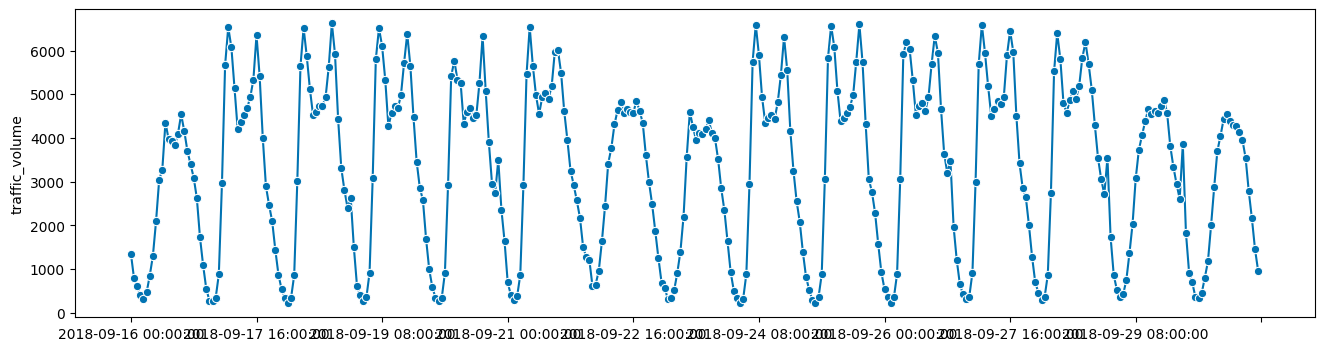

In [7]:
target_col = "traffic_volume"

target_data = dataframe[target_col].tail(3000)

plotting.plot_series(target_data.tail(360))

In [8]:
%%time

ex_stat = ExtractStats(frequency="H")

stat = ex_stat.extract_statistics(target_data)

INFO:src.ts_stat:detecting strickly positive data...
INFO:src.ts_stat:detecting strickly positive data True
INFO:src.ts_stat:detecting seasonality degree ...
INFO:src.ts_stat:detecting seasonality periods...
INFO:src.ts_stat:Lags used for seasonal detection: 1499
INFO:src.ts_stat:Detected Significant SP: [24, 23, 25] ... [339, 92, 1008]
INFO:src.ts_stat:Detected Primary SP: 24
INFO:src.ts_stat:is_seasonal       True
INFO:src.ts_stat:primary_sp_2_use  24
INFO:src.ts_stat:candidate_sps     [24, 23, 25, 2, 48, 22, 49, 47, 26, 3, 50, 46, 21, 27, 51, 45, 4, 20, 28, 52, 44, 5]
INFO:src.ts_stat:ignificant_sps    [24, 23, 25, 2, 48, 22, 49, 47, 26, 3, 50, 46, 21, 27, 51, 45, 4, 20, 28, 52, 44, 5]
INFO:src.ts_stat:all_sps_to_use    [24]
INFO:src.ts_stat:detecting seasonality Type ...
INFO:src.ts_stat: seasonality Type {seasonality_type}
INFO:src.ts_stat:detecting lowercase_d ...
INFO:src.ts_stat:lowercase_d ...0
INFO:src.ts_stat:detecting upper_d ...
INFO:src.ts_stat:uppercase_d ...0


CPU times: total: 0 ns
Wall time: 55.5 ms


In [9]:
stat

SeriesStat[
	frequency = 'H'
	is_strickly_positive = True
	is_white_noise = False
	is_seasonal = True
	seasonality_type = 'Additive'
	primary_seasonality = 24
	candidate_sps = [24, 23, 25, 2, 48, 22, 49, 47, 26, 3, 50, 46, 21, 27, 51, 45, 4, 20, 28, 52, 44, 5]
	significant_sps = [24, 23, 25, 2, 48, 22, 49, 47, 26, 3, 50, 46, 21, 27, 51, 45, 4, 20, 28, 52, 44, 5]
	all_sps_to_use = [24]
	lower_d = 0
	uppercase_d = 0 
]

In [10]:
dd = stat.to_dict()

In [11]:
stat.to_dataframe()

,Values
frequency,H
is_strickly_positive,True
is_white_noise,False
is_seasonal,True
seasonality_type,Additive
primary_seasonality,24
candidate_sps,"[24, 23, 25, 2, 48, 22, 49, 47, 26, 3, 50, 46,..."
significant_sps,"[24, 23, 25, 2, 48, 22, 49, 47, 26, 3, 50, 46,..."
all_sps_to_use,[24]
lower_d,0


In [12]:
import pandas as pd

pd.DataFrame.from_dict(
    dd,
    orient="index",
    columns=["Values"],
)

,Values
frequency,H
is_strickly_positive,True
is_white_noise,False
is_seasonal,True
seasonality_type,Additive
primary_seasonality,24
candidate_sps,"[24, 23, 25, 2, 48, 22, 49, 47, 26, 3, 50, 46,..."
significant_sps,"[24, 23, 25, 2, 48, 22, 49, 47, 26, 3, 50, 46,..."
all_sps_to_use,[24]
lower_d,0
